<a href="https://colab.research.google.com/github/jimmyboman/GenClass/blob/master/trainer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1.0
print(tf.__version__)

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 34.8MB/s 
     |████████████████████████████████| 3.9MB 44.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=fdca0a9823702ccfcb239407a0ae7dda38a413cd15adb581c27b52e313c8a693
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0


In [0]:
import tensorflow as tf
from training import training_loader, make_generator, train
from models import binary_cnn

impath = '/content/drive/My Drive/Exjobb/train_ims/'
maskpath = '/content/drive/My Drive/Exjobb/train_masks/'
valimpath = '/content/drive/My Drive/Exjobb/val_ims/'
valmaskpath = '/content/drive/My Drive/Exjobb/val_masks/'

seg_size = 32
channels = 3
batch_size = 128

x_train, y_train = training_loader(impath, maskpath, seg_size, channels)
x_val, y_val = training_loader(valimpath, valmaskpath, seg_size, channels)

opt = tf.keras.optimizers.Adam(lr=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cnn = binary_cnn(seg_size, seg_size, 3, opt, loss)

train_generator = make_generator(cnn, x_train, y_train, batch_size, 
          rotation_range=90, horizontal_flip=True, width_shift_range=0.4, height_shift_range=0.4, shear_range=1.0)

val_generator = make_generator(cnn, x_val, y_val, batch_size)

history = train(cnn, train_generator, val_generator, 20)  




9 images found
1 images found
80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/20
    333/Unknown - 26s 77ms/step - loss: 0.2291 - accuracy: 0.9281

KeyboardInterrupt: ignored

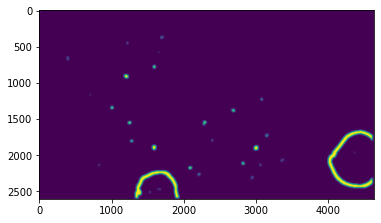

In [0]:
from segtools_fast import anom_scores, anom_scores_partial, imgseg
from matplotlib.pyplot import imread, imshow, show
test_im = imread('/content/drive/My Drive/Exjobb/Plates_phone/train_images/07.png')
stride = 8
anomap = anom_scores('cnn', cnn, test_im, seg_size, seg_size, channels, stride)
imshow(anomap)
show()

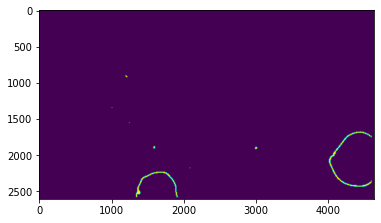

In [0]:
imshow(anomap > 15)
show()

In [0]:
cnn.trainable = True
cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
history_fine = train(cnn,train_generator, val_generator, 20)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1922 steps, validate for 8 steps
Epoch 1/20
1922/1922 [==============================] - 150s 78ms/step - loss: 0.1569 - accuracy: 0.9565 - val_loss: 0.1825 - val_accuracy: 0.9688
Epoch 2/20
1922/1922 [==============================] - 149s 78ms/step - loss: 0.1113 - accuracy: 0.9686 - val_loss: 0.0599 - val_accuracy: 0.9896
Epoch 3/20
1922/1922 [==============================] - 150s 78ms/step - loss: 0.0877 - accuracy: 0.9744 - val_loss: 0.1076 - val_accuracy: 0.9865
Epoch 4/20
1922/1922 [==============================] - 151s 78ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.1148 - val_accuracy: 0.9834
Epoch 5/20
1922/1922 [==============================] - 149s 78ms/step - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.0959 - val_accuracy: 0.9896
Epoch 6/20
1922/1922 [==============================] - 150s 78ms/step - loss: 0.0391 - accuracy: 0.9869 - val_loss: 0.1115 - val_accuracy: 0.9834
Epoch 7/20
1922/1922 [===

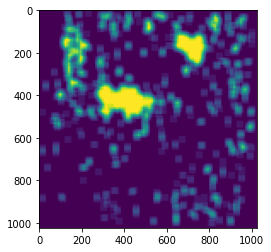

In [0]:
test_im = imread('/content/drive/My Drive/Exjobb/Wood/color01.png')
anomap = anom_scores('cnn', cnn, test_im, seg_size, seg_size, channels, stride)
imshow(anomap)
show()

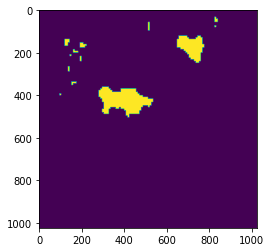

In [0]:
imshow(anomap > 13)
show()

In [0]:
cnn.save('VGG19_TL_plates1-2-4+badpic_1+60epochs.h5')